In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import folium

from tqdm.notebook import tqdm
import time


In [2]:
#한글 처리 코드
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin': #macos
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #windows os
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
data =pd.read_csv('data\최종데이터.csv', sep= ',')

In [32]:
data

,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율,lat,lng,일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율
행정구역,,,,,,,,,,,,,
서울,9733509,4334918,2.25,4745088,4988421,0.95,37.551891,126.991794,3982290,3750423,200849,31018,5.043555
부산,3411819,1499152,2.28,1674202,1737617,0.96,35.210014,129.068870,1405037,1400161,3148,1728,0.224051
대구,2436488,1032478,2.36,1204387,1232101,0.98,35.829437,128.565512,985816,983222,1224,1370,0.124161
인천,2956119,1239915,2.38,1481749,1474370,1.01,37.456256,126.705206,1147200,1121899,24207,1094,2.110094
광주,1456688,617379,2.36,720931,735757,0.98,35.155736,126.835427,599217,598368,247,602,0.041220
대전,1474152,636203,2.32,736259,737893,1.00,36.339818,127.394049,631208,627616,1955,1637,0.309724
울산,1147037,469007,2.45,589233,557804,1.06,35.553723,129.238055,444087,443290,269,528,0.060574
세종,342328,136056,2.52,170729,171599,0.99,36.560698,127.258733,139106,138811,209,86,0.150245
경기,13250368,5480444,2.42,6665310,6585058,1.01,37.528914,127.172777,5098431,4997928,88936,11567,1.744380


In [5]:
data.set_index('행정구역', inplace = True)

In [6]:
 data = data.iloc[:, :13]

In [7]:
#data.총인구수.mean(skipna=True)

In [8]:
data_price = pd.read_csv('data\m2당 분양가 최종.csv', sep = ',')

In [9]:
data_price.set_index(['지역명'], inplace = True)

In [10]:
data_price.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='지역명')

In [11]:
data.index

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'],
      dtype='object', name='행정구역')

In [12]:
df = pd.concat([data, data_price], axis = 1)
df.head()

,총인구수,세대수,세대당_인구,남자_인구수,여자_인구수,남여_비율,lat,lng,일반가구,지상,지하(반지하),옥상(옥탑),지하 거주 비율,모든면적,전용면적 102제곱미터초과,전용면적 60제곱미터이하,전용면적 60제곱미터초과 85제곱미터이하,전용면적 85제곱미터초과 102제곱미터이하
서울,9733509,4334918,2.25,4745088,4988421,0.95,37.551891,126.991794,3982290,3750423,200849,31018,5.043555,8154.583333,9000.500000,8389.333333,8136.916667,11441.416667
부산,3411819,1499152,2.28,1674202,1737617,0.96,35.210014,129.068870,1405037,1400161,3148,1728,0.224051,4014.416667,4132.750000,3927.666667,4027.250000,4129.750000
대구,2436488,1032478,2.36,1204387,1232101,0.98,35.829437,128.565512,985816,983222,1224,1370,0.124161,4589.416667,4934.000000,4481.083333,4586.833333,4612.000000
인천,2956119,1239915,2.38,1481749,1474370,1.01,37.456256,126.705206,1147200,1121899,24207,1094,2.110094,4446.666667,4859.166667,4326.333333,4457.083333,4612.250000
광주,1456688,617379,2.36,720931,735757,0.98,35.155736,126.835427,599217,598368,247,602,0.041220,3787.916667,4411.416667,3892.250000,3793.750000,4610.000000


#EDA

In [13]:
df.shape

(17, 18)

In [14]:
df.isnull().sum() # 4 null, 사용 x

총인구수                       0
세대수                        0
세대당_인구                     0
남자_인구수                     0
여자_인구수                     0
남여_비율                      0
lat                        0
lng                        0
일반가구                       0
지상                         0
지하(반지하)                    0
옥상(옥탑)                     0
지하 거주 비율                   0
모든면적                       0
전용면적 102제곱미터초과             0
전용면적 60제곱미터이하              1
전용면적 60제곱미터초과 85제곱미터이하     0
전용면적 85제곱미터초과 102제곱미터이하    3
dtype: int64

In [15]:
df_cor = df[['총인구수', '남자_인구수', '여자_인구수', '일반가구', '지상', '지하(반지하)', '옥상(옥탑)', '모든면적']]
df_map = df[['총인구수', '남여_비율', '지하 거주 비율', '모든면적', 'lat', 'lng']] #총인구수, 남여비율, 지하거주비율, 집값 마커

##1. correlation

###1.1 scatterplot
###1.2 pairplot & heatmap #상관관계 있는 것들 보기
###1.3 기타 plot #2개씩 뽑아서 상관관계 있는 것들 보기

In [16]:
df_cor = df_cor.reset_index()

In [17]:
df_cor.head(1)

,index,총인구수,남자_인구수,여자_인구수,일반가구,지상,지하(반지하),옥상(옥탑),모든면적
0,서울,9733509,4745088,4988421,3982290,3750423,200849,31018,8154.583333


In [19]:
df_cor.columns

Index(['index', '총인구수', '남자_인구수', '여자_인구수', '일반가구', '지상', '지하(반지하)', '옥상(옥탑)',
       '모든면적'],
      dtype='object')

In [29]:
type(df_cor)

pandas.core.frame.DataFrame

<Axes: xlabel='행정구역', ylabel='옥상(옥탑)'>

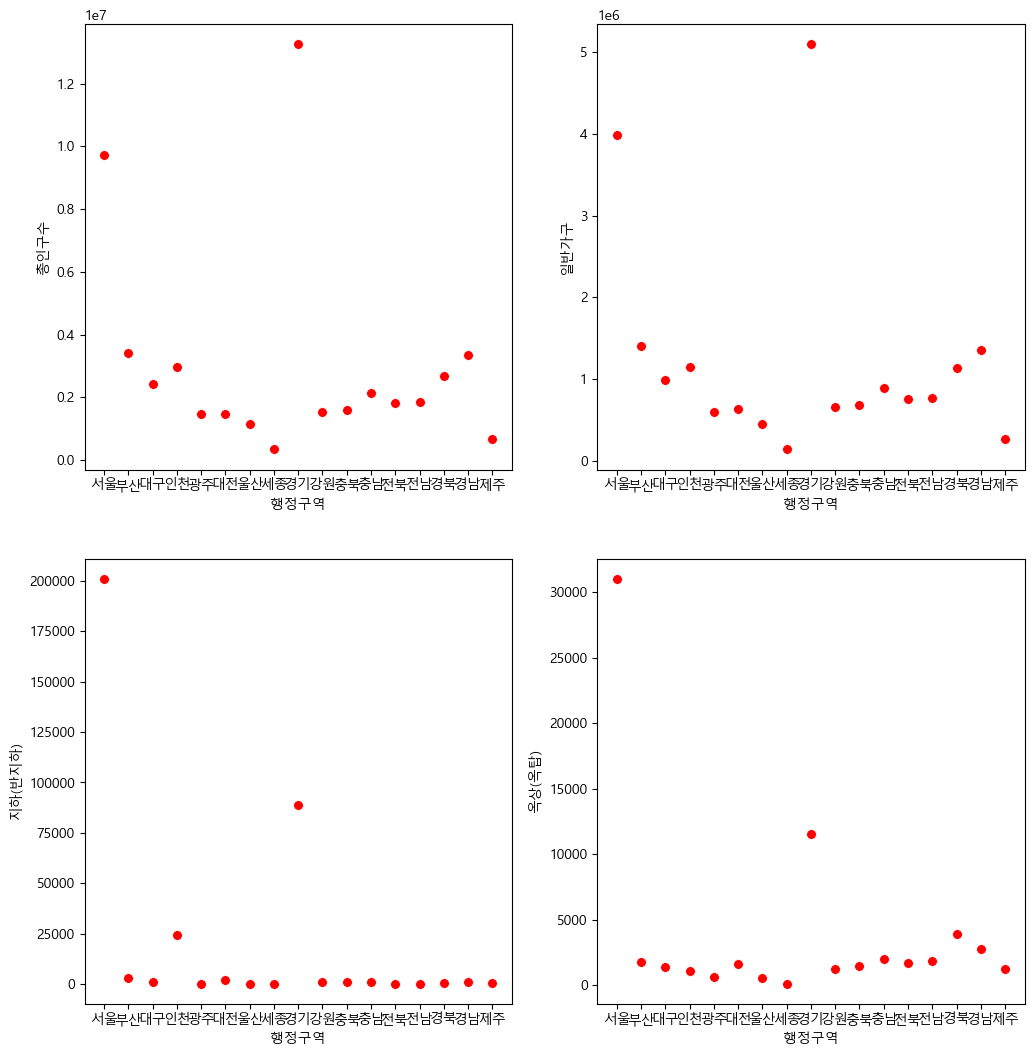

In [50]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
plt.subplots_adjust(left=0.05, bottom=0.01, right=0.99, 
                    top=0.99, wspace=None, hspace=0.2)
ax[0,0].set_xlabel('행정구역')
ax[0,1].set_xlabel('행정구역')
ax[1,0].set_xlabel('행정구역')
ax[1,1].set_xlabel('행정구역')
sns.scatterplot(data = df_cor, x = 'index', y = '총인구수', color = 'r', s = 50, ax = ax[0,0])
sns.scatterplot(data = df_cor,x = 'index', y = '일반가구', color = 'r', s = 50, ax = ax[0,1])
sns.scatterplot(data = df_cor,x = 'index', y = '지하(반지하)', color = 'r', s = 50, ax = ax[1,0])
sns.scatterplot(data = df_cor,x = 'index', y = '옥상(옥탑)', color = 'r', s = 50, ax = ax[1,1])

In [53]:
from sklearn import preprocessing
col = ['총인구수', '일반가구', '지하(반지하)', '옥상(옥탑)']
x = df_cor[col].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled[:3])
df_cor_norm = pd.DataFrame(x_scaled, columns = col, index = data.index)
df_cor_norm

[[0.72754508 0.77494094 1.         1.        ]
 [0.23779683 0.25526276 0.01464813 0.05308418]
 [0.16223687 0.1707309  0.00505881 0.04151041]]


,총인구수,일반가구,지하(반지하),옥상(옥탑)
행정구역,,,,
서울,0.727545,0.774941,1.000000,1.000000
부산,0.237797,0.255263,0.014648,0.053084
대구,0.162237,0.170731,0.005059,0.041510
인천,0.202493,0.203272,0.119607,0.032588
광주,0.086331,0.092777,0.000189,0.016682
대전,0.087684,0.099228,0.008702,0.050142
울산,0.062342,0.061496,0.000299,0.014289
세종,0.000000,0.000000,0.000000,0.000000
경기,1.000000,1.000000,0.442220,0.371169


c:\Users\BIT\AppData\Local\miniconda3\envs\p39-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
c:\Users\BIT\AppData\Local\miniconda3\envs\p39-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


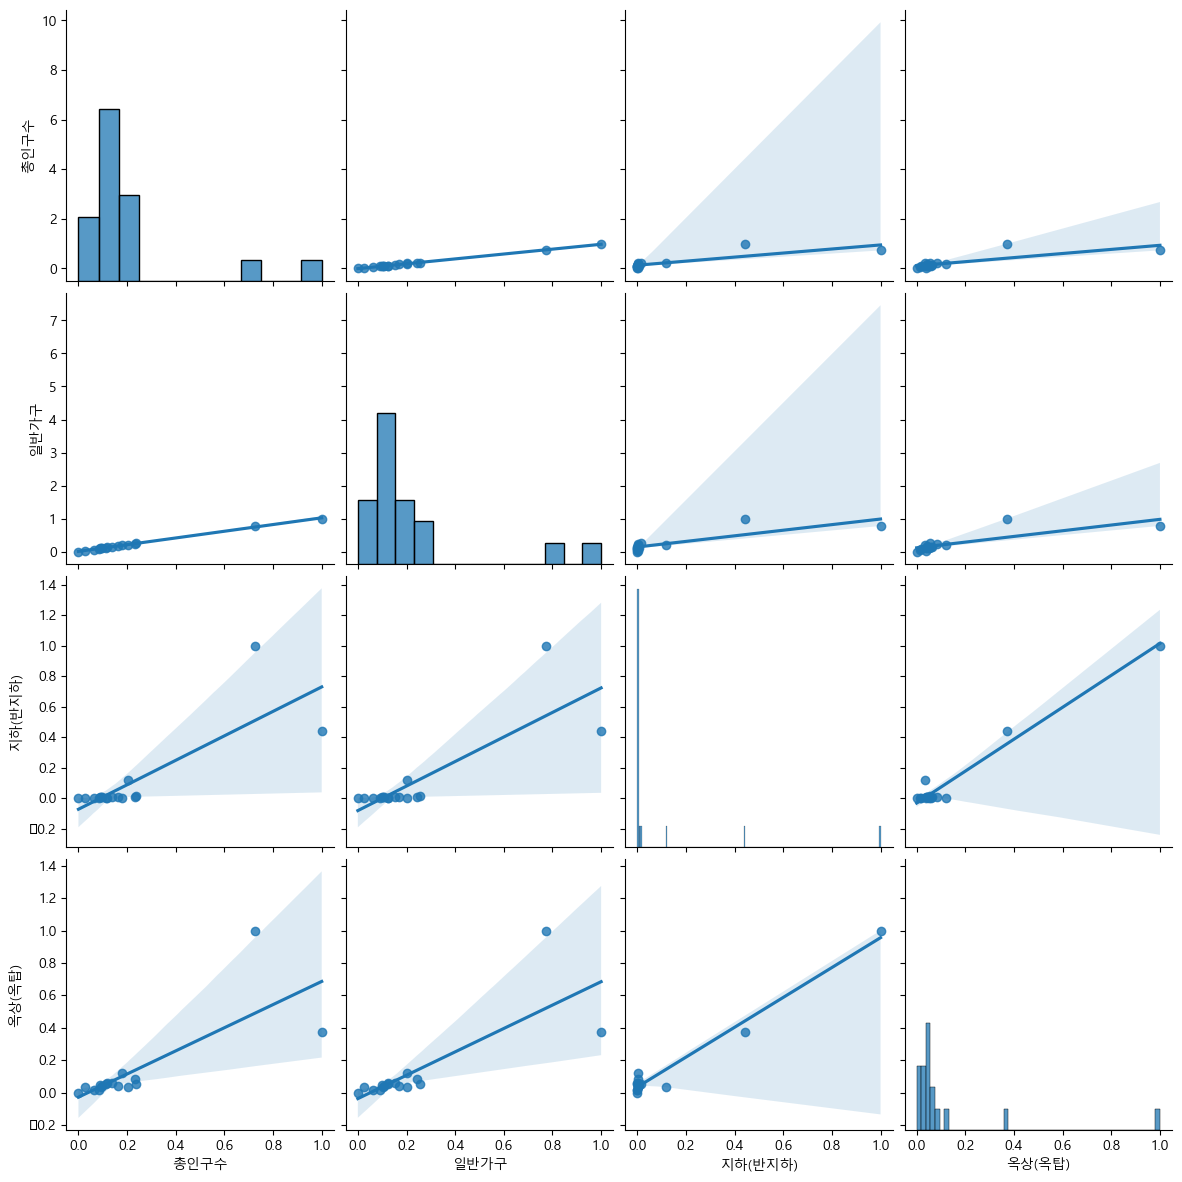

In [55]:
sns.pairplot(df_cor_norm, vars = ['총인구수', '일반가구', '지하(반지하)', '옥상(옥탑)'], kind = 'reg', height= 3)
plt.show()

c:\Users\BIT\AppData\Local\miniconda3\envs\p39-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
c:\Users\BIT\AppData\Local\miniconda3\envs\p39-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


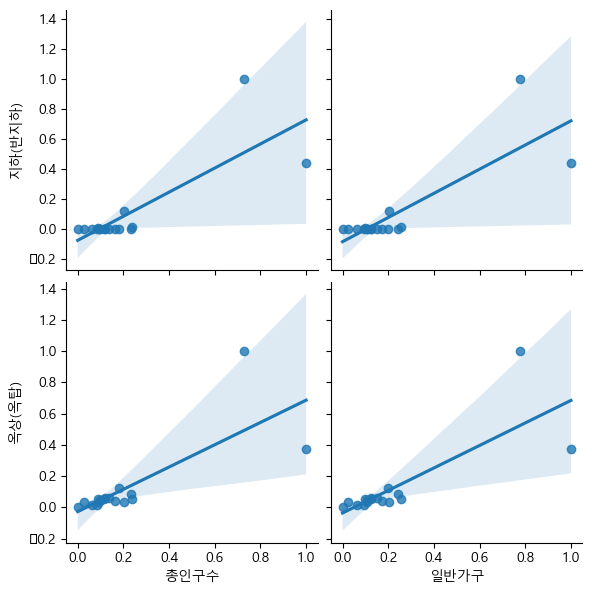

In [57]:
sns.pairplot(df_cor_norm, x_vars= ['총인구수', '일반가구'],
             y_vars= ['지하(반지하)', '옥상(옥탑)'], kind= 'reg', height= 3)
plt.yticks(fontname = 'Glyph 8722')
plt.show()

In [60]:
df_cor_norm_sort = df_cor_norm.sort_values(by = '총인구수', ascending = False)

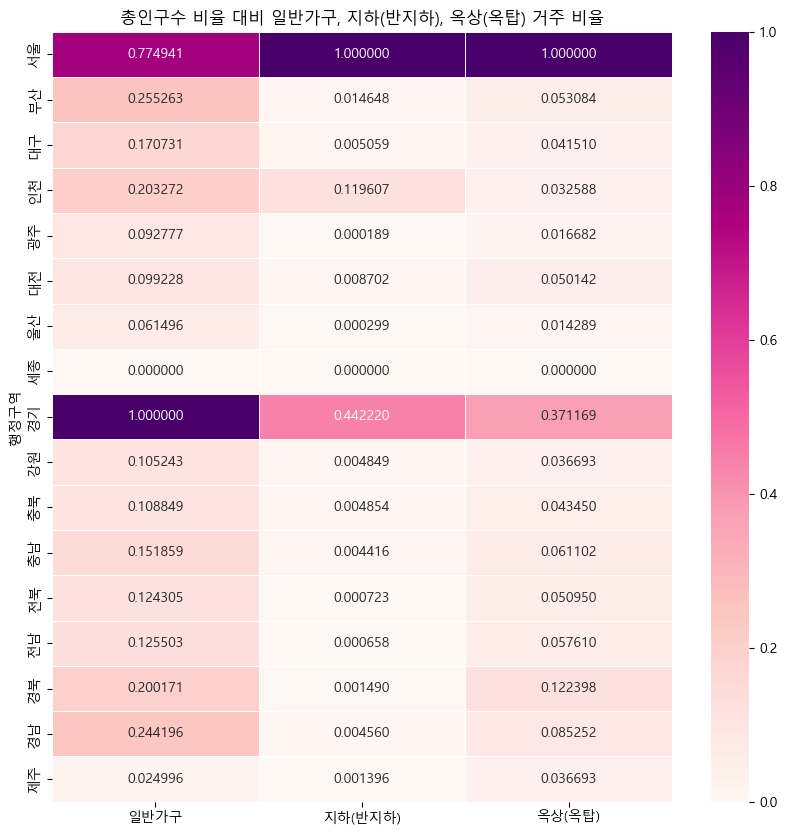

In [62]:
target_col =  ['일반가구', '지하(반지하)', '옥상(옥탑)']
plt.figure(figsize=(10, 10))
sns.heatmap(df_cor_norm[target_col], annot = True, fmt= 'f', linewidths= 0.5, cmap= 'RdPu')
plt.title('총인구수 비율 대비 일반가구, 지하(반지하), 옥상(옥탑) 거주 비율')
plt.show()

In [ ]:
#temperature = [25.2, 27.4, 22.9, 26.2, 29.5, 33.1, 30.4, 36.1, 34.4, 29.1]
#Ice_cream_sales = [236500, 357500, 203500, 365200, 446600, 574200, 453200, 675400, 598400, 463100]
#dict_data = {'기온':temperature, '아이스크림 판매량':Ice_cream_sales}
#df_ice_cream = pd.DataFrame(dict_data, columns=['기온', '아이스크림 판매량'])
#print(df_ice_cream)
#df_ice_cream.plot.scatter(x='기온', y='아이스크림 판매량', grid=True, title='최고 기온과 아이스크림 판매량')
#plt.show()

##2.mapping

###2.1.총인구수 map
###2.2.남여비율 map
###2.3.지하거주비율 map
###2.4.집값 map

In [68]:
df_map

,총인구수,남여_비율,지하 거주 비율,모든면적,lat,lng
서울,9733509,0.95,5.043555,8154.583333,37.551891,126.991794
부산,3411819,0.96,0.224051,4014.416667,35.210014,129.068870
대구,2436488,0.98,0.124161,4589.416667,35.829437,128.565512
인천,2956119,1.01,2.110094,4446.666667,37.456256,126.705206
광주,1456688,0.98,0.041220,3787.916667,35.155736,126.835427
대전,1474152,1.00,0.309724,3361.833333,36.339818,127.394049
울산,1147037,1.06,0.060574,3697.833333,35.553723,129.238055
세종,342328,0.99,0.150245,3441.000000,36.560698,127.258733
경기,13250368,1.01,1.744380,4358.583333,37.528914,127.172777
강원,1540540,1.01,0.178809,2827.666667,37.724962,128.300963


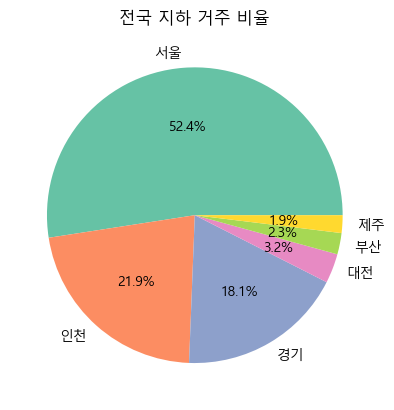

In [95]:
ratio = df_map.sort_values(by = '지하 거주 비율', ascending= False)['지하 거주 비율'][:6]
labels = df_map.sort_values(by = '지하 거주 비율', ascending= False).index[:6]
plt.title('전국 지하 거주 비율')
plt.pie(ratio, labels = labels, autopct = '%.1f%%', colors=sns.color_palette('Set2'))
plt.show()

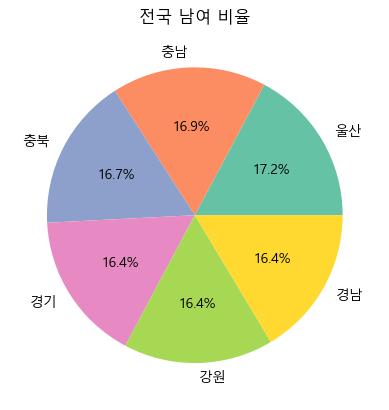

In [104]:
%matplotlib inline
ratio = df_map.sort_values(by = '남여_비율', ascending= False)['남여_비율'][:6]
labels = df_map.sort_values(by = '남여_비율', ascending= False).index[:6]
plt.title('전국 남여 비율')
plt.pie(ratio, labels = labels, autopct = '%.1f%%', colors=sns.color_palette('Set2'))
plt.show()

In [100]:

map = folium.Map(location = [df_map['lat'].median(), df_map['lng'].median()], zoom_start = 5.5)
loc = '지하(반지하) 거주 인구 비율'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map.get_root().html.add_child(folium.Element(title_html))
for n in range(len(df_map.index)):
    folium.CircleMarker([df_map['lat'][n],
                         df_map['lng'][n]],
                         radius = df_map['지하 거주 비율'][n] * 10, color = '#CD3181',
                         fill_color = '#CD3181',
                         fill = True,
                         ).add_to(map)
folium.TileLayer("Stamen Toner").add_to(map)
map

In [91]:
map = folium.Map(location = [df_map['lat'].median(), df_map['lng'].median()], zoom_start = 5)
loc = '남여 비율'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map.get_root().html.add_child(folium.Element(title_html))
for n in range(len(df_map.index)):
    folium.CircleMarker([df_map['lat'][n],
                         df_map['lng'][n]],
                         radius = df_map['남여_비율'][n] * 10, color = '#CD3181',
                         fill_color = '#CD3181',
                         fill = True,
                         ).add_to(map)
folium.TileLayer("Stamen Toner").add_to(map)
map

In [84]:
df_map.columns

Index(['총인구수', '남여_비율', '지하 거주 비율', '모든면적', 'lat', 'lng'], dtype='object')

In [90]:
map = folium.Map(location = [df_map['lat'].median(), df_map['lng'].median()], zoom_start = 5.5)
loc = '전국 집값'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)
map.get_root().html.add_child(folium.Element(title_html))
for n in range(len(df_map.index)):
    folium.CircleMarker([df_map['lat'][n],
                         df_map['lng'][n]],
                         radius = df_map['모든면적'][n] / 600, color = '#CD3181',
                         fill_color = '#CD3181',
                         fill = True,
                         ).add_to(map)
folium.TileLayer("Stamen Toner").add_to(map)
map